#**Brain Tumor Detection**

Brain tumor detection is crucial as early diagnosis significantly improves treatment outcomes and survival rates. Manual detection through MRI scans is time-consuming and prone to human error, whereas **AI-powered models** can analyze medical images with high precision, aiding radiologists in faster and more accurate diagnosis. Automated detection helps in reducing misdiagnosis, improving patient care, and supporting timely medical intervention.

**Changing Runtime Hardware to GPU**

 A GPU significantly accelerates deep learning tasks by handling parallel computations more efficiently than a CPU. This speeds up model training, reducing the time required for complex operations like image processing in brain tumor detection.

**Dataset Usage**

The Brain Tumor Classification (MRI) dataset contains labeled MRI images categorized into tumor types and non-tumor cases. It helps in training machine learning models to identify and classify brain tumors with higher accuracy, aiding in medical diagnosis.

link: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

**Import Dataset:** Download the Brain Tumor Classification (MRI) dataset from Kaggle using the Kaggle API. Upload the kaggle.json file.

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 80% 69.0M/86.8M [00:00<00:00, 244MB/s]
100% 86.8M/86.8M [00:00<00:00, 246MB/s]


In [ ]:
!ls /content

brain-tumor-classification-mri.zip  sample_data


In [ ]:
!unzip /content/brain-tumor-classification-mri.zip -d /content/dataset

Archive:  /content/brain-tumor-classification-mri.zip
  inflating: /content/dataset/Testing/glioma_tumor/image(1).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(10).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(100).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(11).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(12).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(13).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(14).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(15).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(16).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(17).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(18).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(19).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(2).jpg  
  inflating: /content/dataset/Testing/glioma_tumor/image(20).jpg  
  inflati

**Installing Dependencies**

Libraries like TensorFlow, Keras and scikit-learn provide essential tools for deep learning, image processing, and model evaluation. They help in building, training, and optimizing neural networks for tumor detection.

In [ ]:
!pip install keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import pandas as pd
import numpy as np

The **folder paths** for the training and testing datasets are:


1.   Training Dataset: /content/train (Contains 80% of the images for model training)
2.   Testing Dataset: /content/test (Contains 20% of the images for model evaluation)
Each of these folders will have subdirectories for different tumor categories, maintaining class labels.

In [ ]:
#We are taking both training and testing varaibles(dataset) to the training variables in local system.
#The above is done because the image provided can be baised towards training or testing.
#So we combine the total and split according to the requirement.
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

#Training folder path.
for i in labels:
    folderPath = os.path.join('/content/dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

#Testing Folder path
for i in labels:
    folderPath = os.path.join('/content/dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

#The above training variables are list but we use array in DL.
X_train = np.array(X_train)
Y_train = np.array(Y_train)

shuffle the images in the training variables

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape
#The ouput is [no. of images, image size, image size, no. of channels(rgb)]

(3264, 150, 150, 3)

**Split the Dataset**

The dataset is divided into training (80%) and testing (20%) sets to train the model effectively and evaluate its performance. The split ensures that the model learns patterns from training data while being tested on unseen images. This helps in preventing overfitting and improves the accuracy of brain tumor classification.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
#X_train contains images converted to array.
#Y_train contains the labels.
y_train_new = []
for i in y_train:
    y_train_new = [np.argmax(i) for i in y_train]
y_train=np.array(y_train_new)
#label indexes are converted to categorical variables, so model doesn't give any error.
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new = [np.argmax(i) for i in y_test]
y_test=np.array(y_test_new)
y_test = tf.keras.utils.to_categorical(y_test)

**Convolutional Neural Network**

CNN is a deep learning model designed for processing image data. It uses convolutional layers to extract important features like edges, textures, and shapes from MRI scans, making it highly effective for brain tumor detection. CNNs reduce the need for manual feature extraction, improving classification accuracy while handling complex medical imaging efficiently.

In [ ]:
model = Sequential()

#Adding the layer to the model.
#add(<model_name>(no. of parameters,(matrix trianing on), <activation>, input_shape))
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
#The 64 indicates how many output units layer will have.
model.add(Conv2D(64,(3,3),activation='relu'))

#Now we deal with pooling so we add MaxPooling2D layer, since images ar 2D.
model.add(MaxPooling2D(2,2))

#Some images should be dropped out, since not necessary.
model.add(Dropout(0.3))

#Add Multiple layers to the model.
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

#Expand the network since there are many pooling images.
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

# Add Convolution layers because we have multiple layers.
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

#Neural network is created. Flatten the ouput layer.
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
#4 -> layers
#Softmax (probability - yes/no)
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The **model.summary()** output provides a detailed breakdown of your Convolutional Neural Network (CNN) architecture.


*   Layer Type: Each row represents a layer in the model (e.g., Conv2D, MaxPooling2D, Dense).

*   Output Shape: The shape of the data after passing through each layer. Example: (None, 148, 148, 32) means a batch of images (None represents batch size) with dimensions 148x148 pixels and 32 filters.
*   Param # (Parameters): The number of trainable parameters in each layer


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the model is essential as it sets the optimizer to adjust weights and improve predictions. It also defines accuracy metrics to evaluate how well the model is performing during training and validation.

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Training the model helps it learn patterns from the dataset by adjusting its parameters over multiple iterations. During training, the model optimizes its performance using the given data, improving accuracy with each epoch. A validation split helps monitor progress and prevents overfitting.

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 248ms/step - accuracy: 0.2939 - loss: 4.0345 - val_accuracy: 0.3503 - val_loss: 1.3632
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.3462 - loss: 1.3294 - val_accuracy: 0.4694 - val_loss: 1.1808
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.5317 - loss: 1.0792 - val_accuracy: 0.6429 - val_loss: 0.8429
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.6234 - loss: 0.8810 - val_accuracy: 0.7075 - val_loss: 0.7378
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.6635 - loss: 0.7499 - val_accuracy: 0.7449 - val_loss: 0.6145
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.6931 - loss: 0.7176 - val_accuracy: 0.7891 - val_loss: 0.5796
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.7529 - loss: 0.5897 - val_accuracy: 0.7687 - val_loss: 0.5848
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.7836 - loss: 0.5307 - val_accuracy: 0.8

Visualizing accuracy helps track model performance over epochs. **Matplotlib** and **Seaborn** can be used to plot training and validation accuracy, showing how well the model is learning. An upward trend indicates improved predictions and better generalization.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

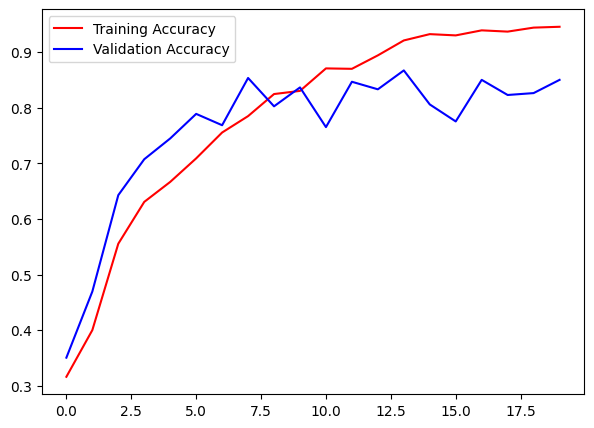

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(7,5))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

Visualizing the decrease in loss helps track model improvement over epochs. Matplotlib and Seaborn can be used to plot the loss values from training and validation data, showing how the model is learning. A downward trend indicates better optimization and improved performance.

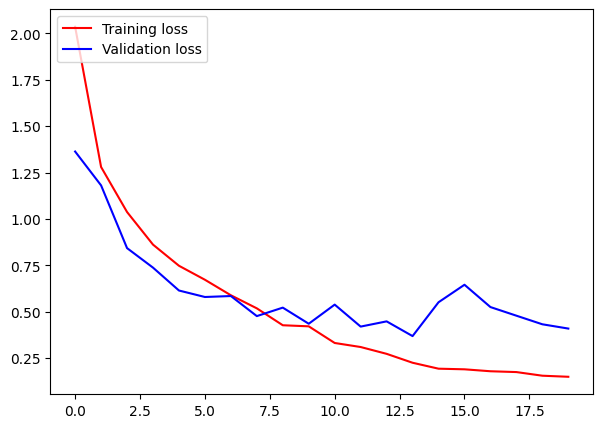

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(7,5))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

**Prediction** involves using the trained model to classify new, unseen data. The model takes an input image, processes it through learned patterns, and outputs a predicted class. This helps evaluate the model's real-world performance and its ability to generalize beyond training data.

In [ ]:
import cv2
import numpy as np
import requests
from io import BytesIO
from PIL import Image

# Load image from URL
url = 'https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-023-41576-6/MediaObjects/41598_2023_41576_Fig1_HTML.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Convert to OpenCV format
img = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Resize
img = cv2.resize(img, (150, 150))

# Convert to numpy array
img_array = np.array(img)
print(img_array.shape)


(150, 150, 3)


In [ ]:
#Reshape the image.
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

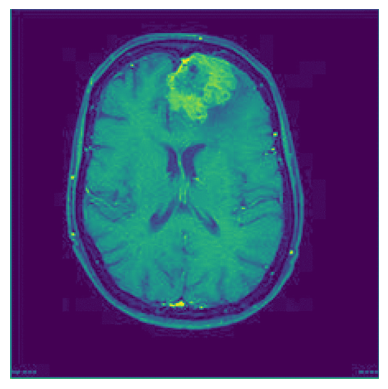

In [ ]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# URL of the image
url = "https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-023-41576-6/MediaObjects/41598_2023_41576_Fig1_HTML.jpg"

# Load the image from the URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()


In [ ]:
#predict is a probability array of 4 values(labels).
a=model.predict(img_array)
indices = a.argmax()
predicted_class = labels[indices]
confidence = a.max()
print(predicted_class)
print(confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
meningioma_tumor
0.9966016
